## Important Questions to Ask about the Dataset
1. What is the dataset about?
2. How many rows and columns does it have?
3. Are the column names meaningful?
4. Are there missing values? If so, in which columns?
5. Should I drop, impute, or flag missing values?
6. Are there duplicates? Should I remove them or merge them?
7. Are categorical variables imbalanced? What are their distributions?
8. Should I merge rare categories into "Other"?
9. Think about how to encode categorical data? (pd.get_dummies() or LabelEncoder)
10. How are my numerical variables distributed? Are they skewed? Are there any outliers? Do I need to cap, transform, remove or leave them? 
11. Do my numerical varialbles need to be scaled or normalized?
12. Check for correlations among the numerical variables. Are there any redundant features?



In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [169]:
df= pd.read_csv('data/stud.csv')

In [170]:
df.head()
df.info()
df.columns
df.shape

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

(1000, 8)

In [171]:
# Checking for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [172]:
#Checking for dupllicates
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='math_score', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of math_score')

Text(0.5, 0, 'math_score')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='reading_score', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of reading_score')

Text(0.5, 0, 'reading_score')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='writing_score', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of writing_score')

Text(0.5, 0, 'writing_score')

Text(0, 0.5, 'Frequency')

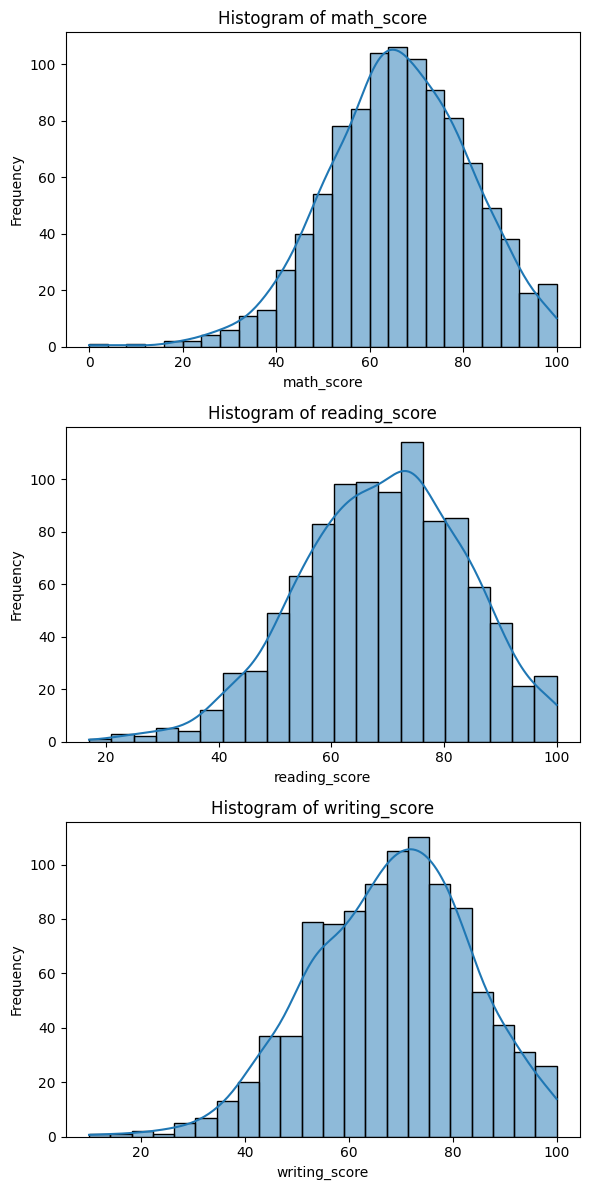

In [173]:
numerical_cols = df.select_dtypes(include=['number']).columns 
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(6, 4 * len(numerical_cols)))
for ax, col in zip(axes, numerical_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.tight_layout() 
plt.show()


<Axes: >

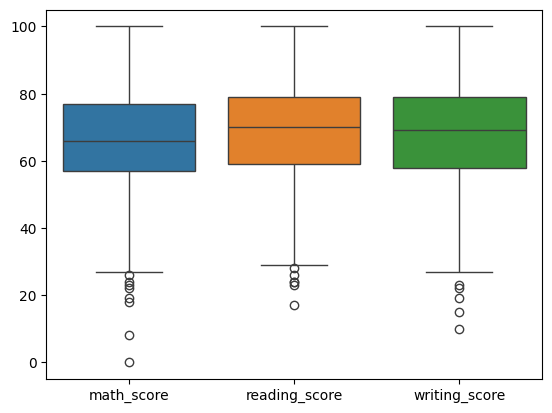

In [174]:
sns.boxplot(df)

For categorical data, we need to understand distributions, missing values, relationships with numerical features, and potential encoding strategies

In [175]:
categorical_cols= df.select_dtypes(include= ['object','category']).columns
categorical_cols

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

## Number Of Unique Values in Categorical Columns

In [176]:
df[categorical_cols].nunique()

gender                         2
race_ethnicity                 5
parental_level_of_education    6
lunch                          2
test_preparation_course        2
dtype: int64

In [177]:
for col in categorical_cols:
    df[col].value_counts(normalize=True) * 100  # Get percentages

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

race_ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

parental_level_of_education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64

test_preparation_course
none         64.2
completed    35.8
Name: proportion, dtype: float64

In [178]:
df[categorical_cols].isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
dtype: int64

<Axes: xlabel='gender'>

Text(0.5, 1.0, 'Percentage of gender')

Text(0.5, 0, 'gender')

Text(0, 0.5, 'Percentage')

Text(0.0, 51.800000000000004, '51.8%')

Text(1.0, 48.199999999999996, '48.2%')

<Axes: xlabel='race_ethnicity'>

Text(0.5, 1.0, 'Percentage of race_ethnicity')

Text(0.5, 0, 'race_ethnicity')

Text(0, 0.5, 'Percentage')

Text(0.0, 31.900000000000002, '31.9%')

Text(1.0, 26.200000000000003, '26.2%')

Text(2.0, 19.0, '19.0%')

Text(3.0, 14.000000000000002, '14.0%')

Text(4.0, 8.9, '8.9%')

<Axes: xlabel='parental_level_of_education'>

Text(0.5, 1.0, 'Percentage of parental_level_of_education')

Text(0.5, 0, 'parental_level_of_education')

Text(0, 0.5, 'Percentage')

Text(0.0, 22.6, '22.6%')

Text(1.0, 22.2, '22.2%')

Text(2.0, 19.6, '19.6%')

Text(3.0, 17.9, '17.9%')

Text(4.0, 11.799999999999999, '11.8%')

Text(5.0, 5.8999999999999995, '5.9%')

<Axes: xlabel='lunch'>

Text(0.5, 1.0, 'Percentage of lunch')

Text(0.5, 0, 'lunch')

Text(0, 0.5, 'Percentage')

Text(0.0, 64.5, '64.5%')

Text(1.0, 35.5, '35.5%')

<Axes: xlabel='test_preparation_course'>

Text(0.5, 1.0, 'Percentage of test_preparation_course')

Text(0.5, 0, 'test_preparation_course')

Text(0, 0.5, 'Percentage')

Text(0.0, 64.2, '64.2%')

Text(1.0, 35.8, '35.8%')

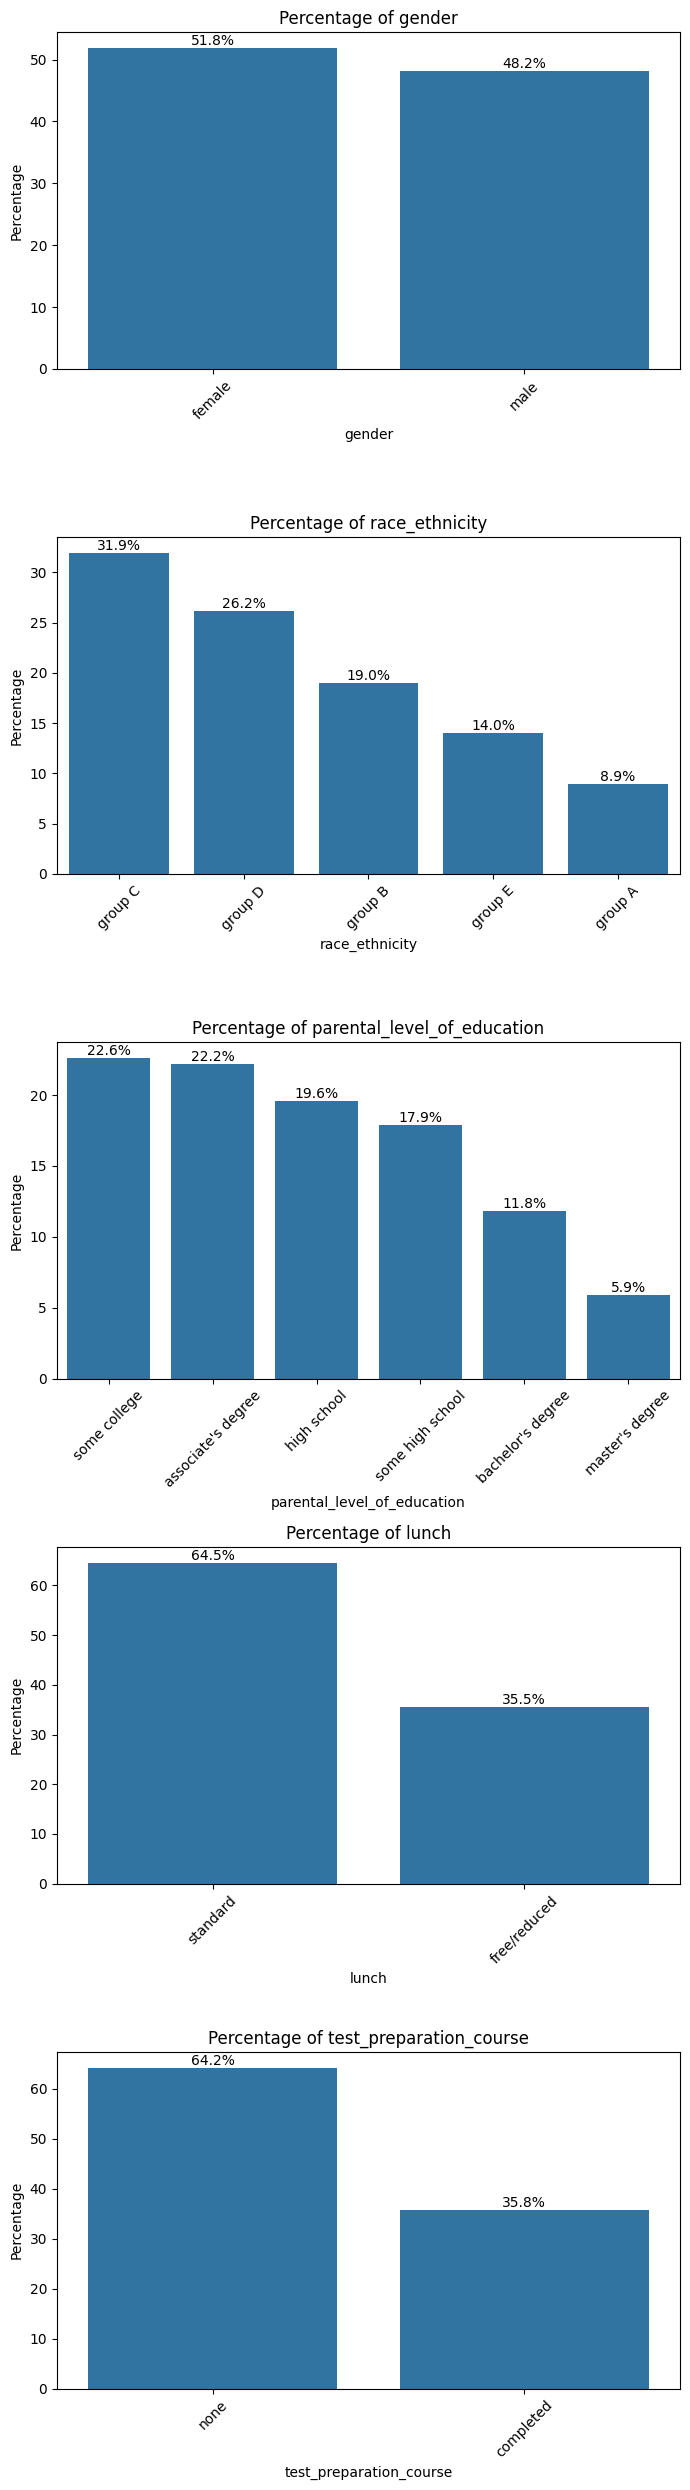

In [179]:
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(7, 5 * len(categorical_cols)))


for ax, col in zip(axes, categorical_cols):
    category_counts = df[col].value_counts(normalize=True) * 100  

    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)  
    ax.set_title(f"Percentage of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Percentage")
    ax.tick_params(axis='x', rotation=45)

    # Annotate bars with percentage values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',  
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()  
plt.show()


In [180]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Feature Engineering

1. Create a composite score as an overall student performance indicator (total score and average score)
2. Score Difference between math and reading vs. math and writing- shows if a student is better at one subject vs another
3. Interaction features: 
    - impact of test preparation course on score
    - impact of parental education on score
    - impact of free lunch on score (as a proxy for socioeconomic status)
    - Prep course effect: Every row receives the average score of its respective group (prep course vs. no prep course)
    - Race-based Avg Score: Every row receives the average score of its respective group (group A, B, C..ect)

In [181]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"] / 3

In [182]:
# Lunch as proxy for socioeconomic status
df["free_reduced_lunch"] = df["lunch"].apply(lambda x: 1 if x== "free/redcuded" else 0)

In [183]:
# test preparation course and score
df["prep_course_effect"] = df.groupby("test_preparation_course")["average_score"].transform("mean")

In [184]:
#parent education and lunch interaction
edu_order = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

df["parent_education_numeric"] = df["parental_level_of_education"].map(edu_order)

df["edu_lunch_interaction"] = df["parent_education_numeric"] * df["free_reduced_lunch"] #captures the combined effect of socioeconomic status and education 


In [185]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,free_reduced_lunch,prep_course_effect,parent_education_numeric,edu_lunch_interaction
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,0,65.038941,5,0
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,0,72.669460,3,0
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,0,65.038941,6,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,0,65.038941,4,0
4,male,group C,some college,standard,none,76,78,75,229,76.333333,0,65.038941,3,0


In [186]:
# Gender based performance differences
df["math_gender_gap"] = df.groupby("gender")["math_score"].transform("mean")
df["reading_gender_gap"] = df.groupby("gender")["reading_score"].transform("mean")
df["writing_gender_gap"] = df.groupby("gender")["writing_score"].transform("mean")
    

In [187]:
# Raccial/Ethnic performance differences
df["race_avg_score"] = df.groupby("race_ethnicity")["average_score"].transform("mean")


In [188]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,free_reduced_lunch,prep_course_effect,parent_education_numeric,edu_lunch_interaction,math_gender_gap,reading_gender_gap,writing_gender_gap,race_avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,0,65.038941,5,0,63.633205,72.608108,72.467181,65.468421
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,0,72.669460,3,0,63.633205,72.608108,72.467181,67.131661
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,0,65.038941,6,0,63.633205,72.608108,72.467181,65.468421
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,0,65.038941,4,0,68.728216,65.473029,63.311203,62.992509
4,male,group C,some college,standard,none,76,78,75,229,76.333333,0,65.038941,3,0,68.728216,65.473029,63.311203,67.131661


In [189]:
print("Number of students with a perfect math score of 100: " + str(len(df[df['math_score']==100])))
print("Number of students with a perfect writing score of 100: " + str(len(df[df['writing_score']==100])))
print("Number of students with a perfect reading score of 100: " + str(len(df[df['reading_score']==100])))

Number of students with a perfect math score of 100: 7
Number of students with a perfect writing score of 100: 14
Number of students with a perfect reading score of 100: 17


In [190]:
df[["math_score", "reading_score","writing_score"]].lt(20).sum()


math_score       4
reading_score    1
writing_score    3
dtype: int64

In [191]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score', 'free_reduced_lunch',
       'prep_course_effect', 'parent_education_numeric',
       'edu_lunch_interaction', 'math_gender_gap', 'reading_gender_gap',
       'writing_gender_gap', 'race_avg_score'],
      dtype='object')

# Visual Exploration of Data

## Influence Of Gender On Average and Total Scores

Insights (for total score and average score):
- The male distribution (orange) appears slightly more spread out, meaning male students have a wider range of scores.
- The female distribution is more concentrated around the higher end of the total score range.
- There are fewer females in the lower score range compared to males.

<Axes: >

<Axes: xlabel='average_score', ylabel='Count'>

<Axes: >

<Axes: xlabel='average_score', ylabel='Count'>

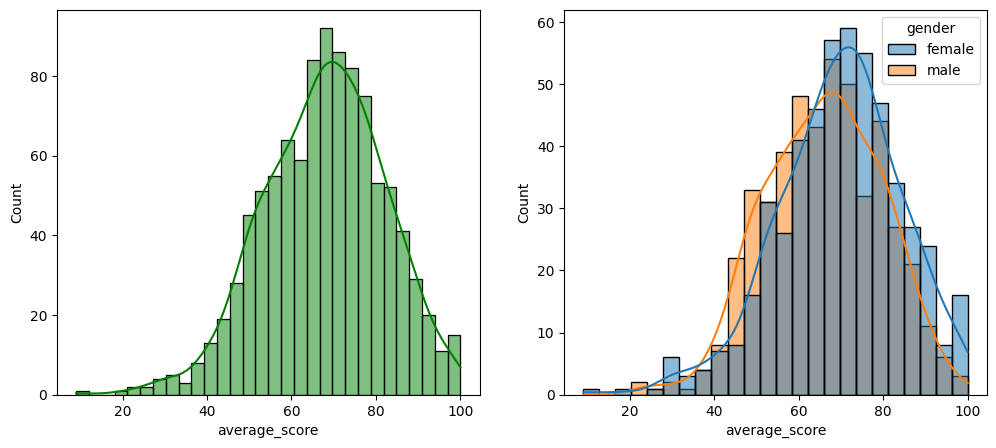

In [198]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()


<Axes: >

<Axes: xlabel='total_score', ylabel='Count'>

<Axes: >

<Axes: xlabel='total_score', ylabel='Count'>

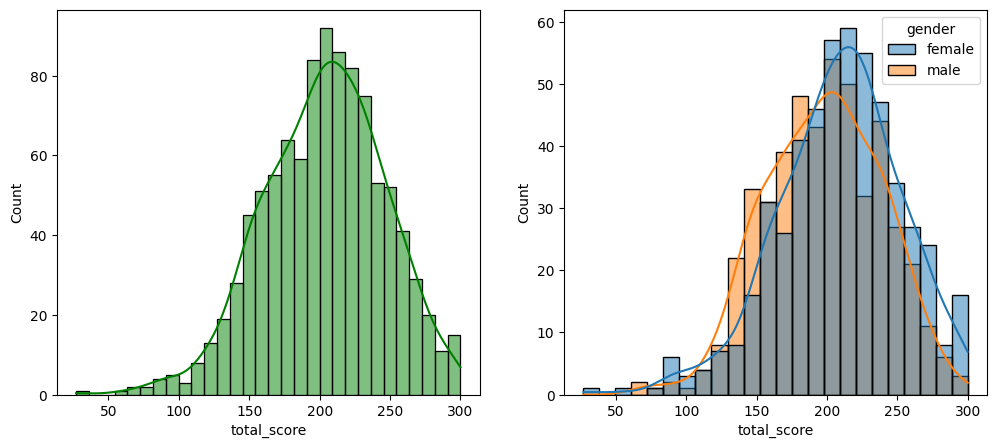

In [197]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()


## Influence Of Free Lunch On Average score
Insights: 
- Students on the standard lunch program (blue) generally score higher than those on the free/reduced lunch program (orange), whether they are male or female
- Students on the free/reduced lunch have a wider distribution, suggesting a wider range of average scores

<Axes: xlabel='average_score', ylabel='Count'>

Text(0.5, 1.0, 'Overall Distribution')

<Axes: xlabel='average_score', ylabel='Count'>

Text(0.5, 1.0, 'Female Students')

<Axes: xlabel='average_score', ylabel='Count'>

Text(0.5, 1.0, 'Male Students')

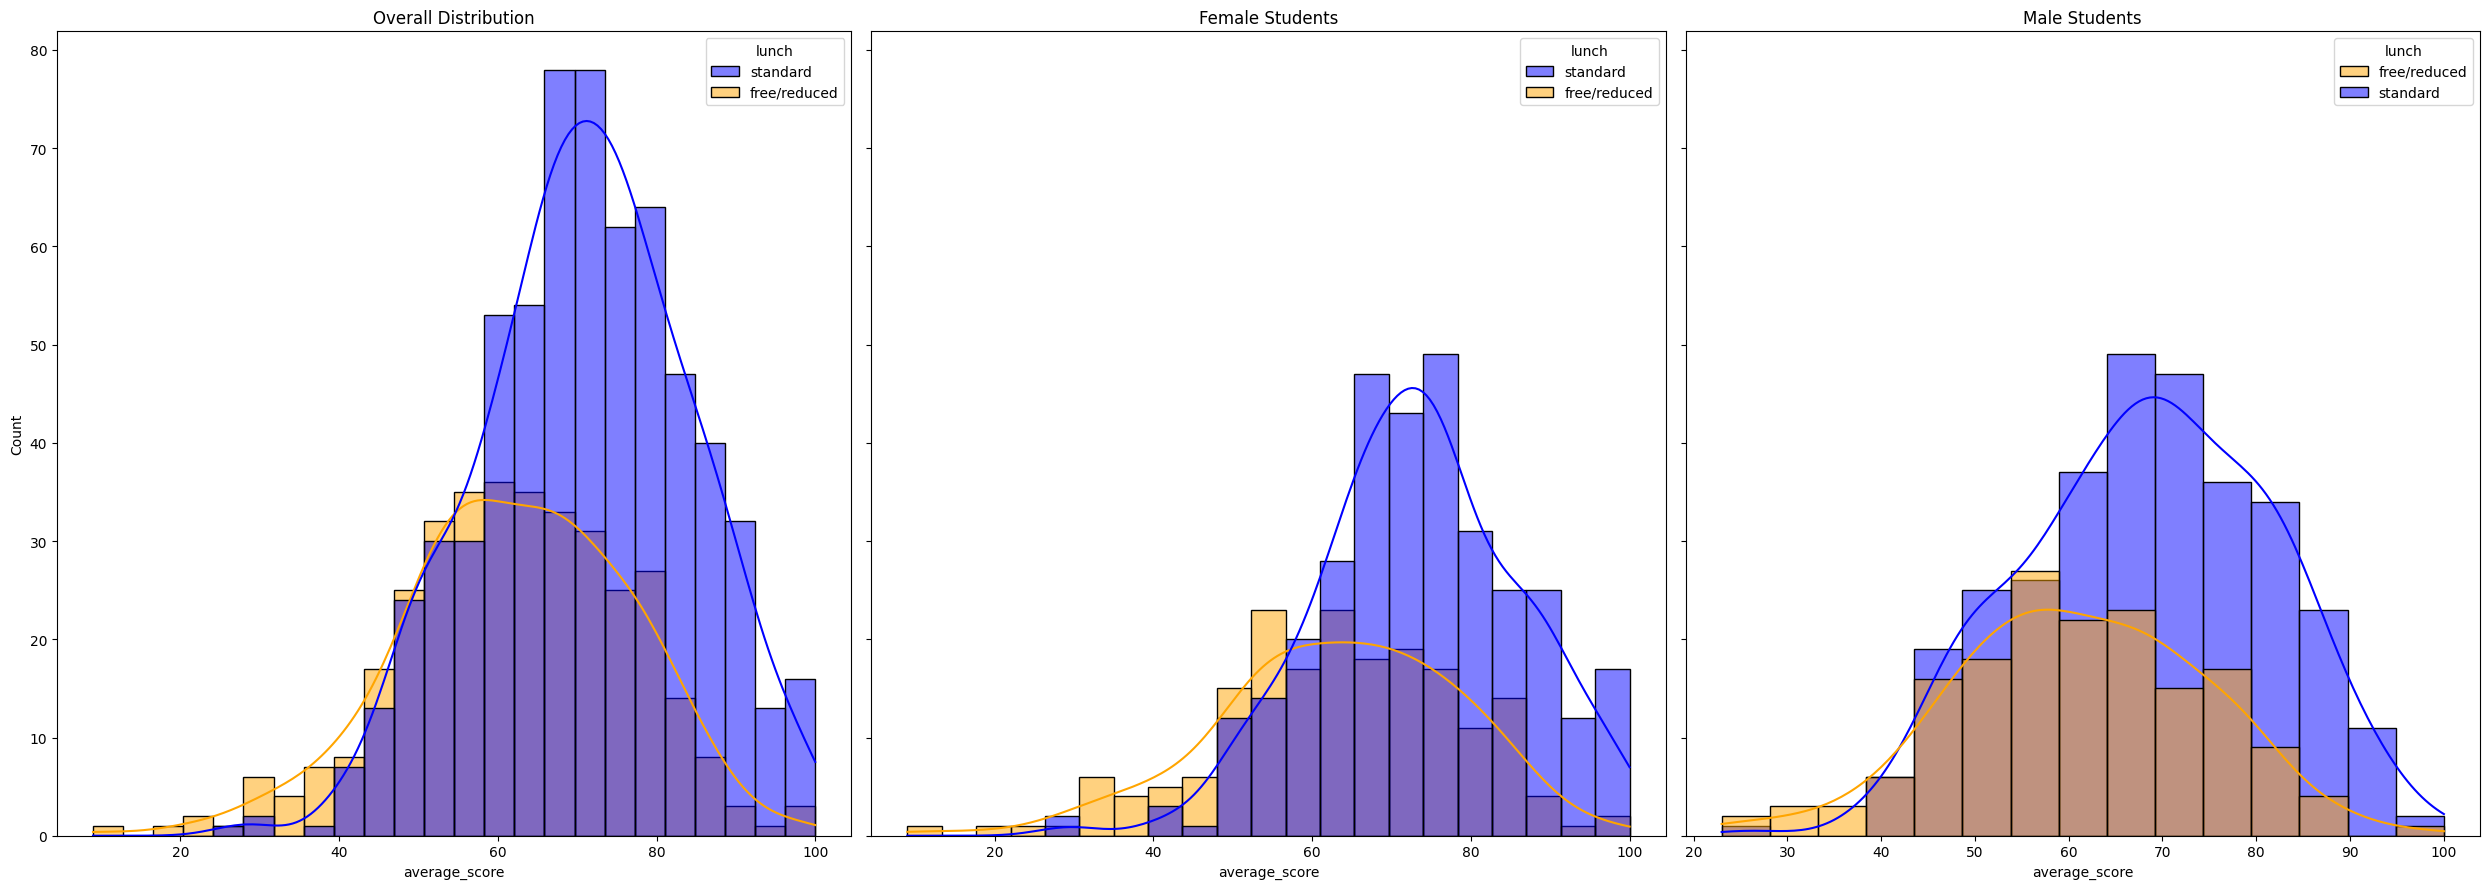

In [202]:
lunch_palette = {"free/reduced": "orange", "standard": "blue"}
fig, axes = plt.subplots(1, 3, figsize=(25, 9), sharey=True)  

sns.histplot(data=df, x='average_score', kde=True, hue='lunch', ax=axes[0], palette=lunch_palette)
axes[0].set_title("Overall Distribution")

# Plot 2: Female Students
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='lunch', ax=axes[1], palette=lunch_palette)
axes[1].set_title("Female Students")

# Plot 3: Male Students
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='lunch', ax=axes[2], palette=lunch_palette)
axes[2].set_title("Male Students")


plt.tight_layout()
plt.show()


## Influence Of Parental Education On Average Scores



<Axes: xlabel='average_score', ylabel='Count'>

Text(0.5, 1.0, "Parental Education: bachelor's degree")

Text(0.5, 0, 'Average_score')

Text(0, 0.5, 'Count')

<Axes: xlabel='average_score', ylabel='Count'>

Text(0.5, 1.0, 'Parental Education: some college')

Text(0.5, 0, 'Average_score')

Text(0, 0.5, 'Count')

<Axes: xlabel='average_score', ylabel='Count'>

Text(0.5, 1.0, "Parental Education: master's degree")

Text(0.5, 0, 'Average_score')

Text(0, 0.5, 'Count')

<Axes: xlabel='average_score', ylabel='Count'>

Text(0.5, 1.0, "Parental Education: associate's degree")

Text(0.5, 0, 'Average_score')

Text(0, 0.5, 'Count')

<Axes: xlabel='average_score', ylabel='Count'>

Text(0.5, 1.0, 'Parental Education: high school')

Text(0.5, 0, 'Average_score')

Text(0, 0.5, 'Count')

<Axes: xlabel='average_score', ylabel='Count'>

Text(0.5, 1.0, 'Parental Education: some high school')

Text(0.5, 0, 'Average_score')

Text(0, 0.5, 'Count')

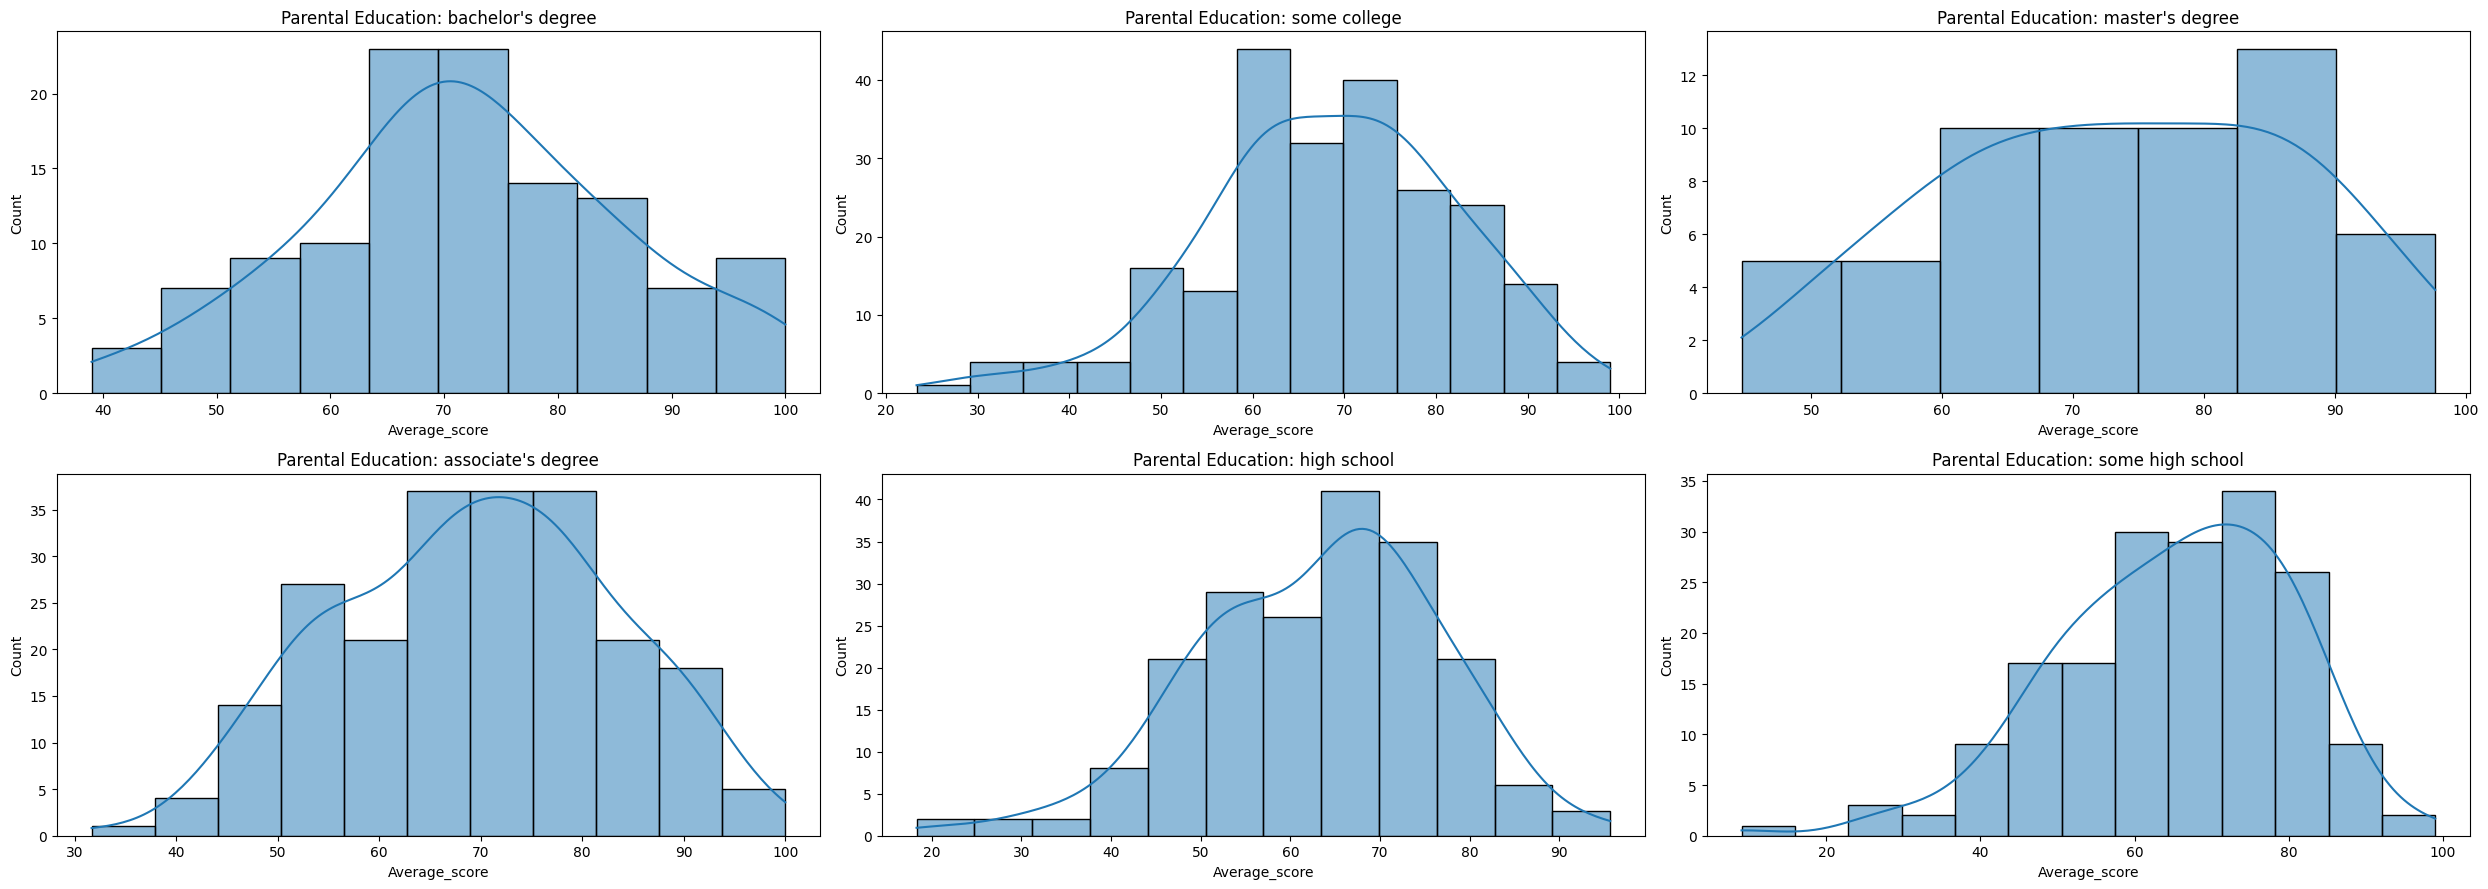

In [212]:
levels = df["parental_level_of_education"].unique()
fig, axes = plt.subplots(2, 3, figsize=(25, 9))

axes = axes.flatten()

for i, level in enumerate(levels):
    sns.histplot( data= df[df['parental_level_of_education']== level], x= 'average_score', kde= True, ax= axes[i])
    axes[i].set_title(f"Parental Education: {level}")
    axes[i].set_xlabel("Average_score")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()
